In [1]:
#import relevant library packages
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Done!')

C:\Users\Auditor\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Done!


In [2]:
housing_pd = pd.read_csv('Documents/housing.csv')

In [3]:
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


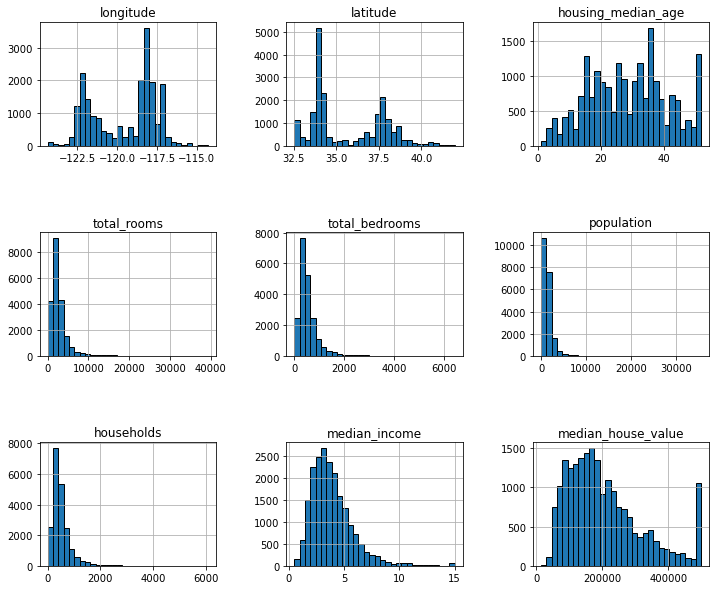

In [7]:
housing_pd.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [8]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#shuffling our data frame

In [10]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)

In [11]:
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [12]:
#Turning each ocean_proximity word value to a numerical value

pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [13]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [14]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
         pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)

In [15]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [16]:
#make the last column

In [17]:
housing_pd_final = housing_pd_final[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                     'total_bedrooms','population', 'households','median_income', 
                                     '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN','median_house_value']]

In [18]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [19]:
#Droping rows with null
housing_pd_final = housing_pd_final.dropna()

In [20]:
len(housing_pd_final)

20433

In [21]:
#207 rows have been drops

In [22]:
#Next we create sets to Test, Test and Validate

In [23]:
train_pd, test_pd, val_pd = housing_pd_final[:18000],housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [24]:
#Now we create our Featute (X) and Target(y) Sets
X_train, y_train = train_pd.to_numpy()[:,:-1], train_pd.to_numpy()[:,-1]
X_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:,-1]
X_test, y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [25]:
#Ensuring we have the same number of columns

print(X_train.shape)
print(y_train.shape)


# Xtrain is has 18000 rows and 13 colums (an 18,000X13 matrix) and y_train has 18,000 rows

(18000, 13)
(18000,)


In [26]:
#Scaling and transforming data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#Now we fit the scaler/ transformer/ preprocesser

In [29]:
scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [30]:
X_train.shape, y_train.shape, X_val.shape

((18000, 13), (18000,), (1218, 13))

In [31]:
X_train_preprocessed

NameError: name 'X_train_preprocessed' is not defined

In [32]:
pd.DataFrame(X_train_preprocessed).head()

NameError: name 'X_train_preprocessed' is not defined

In [33]:
pd.DataFrame(X_train_preprocessed)[0].hist()

NameError: name 'X_train_preprocessed' is not defined

In [ ]:
# we are going make models and compare all the models using a metric called Mean Squared Error

In [ ]:
# sum((y_hat(x) - y)^2)/n

In [34]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

In [35]:
#it's always good for both errors to be close To avoid over fitting

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(43554.88989730859, 53483.18574820349)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(47274.82259072157, 51213.090380233)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [40]:
simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)


Epoch 1/100

547/563 [============================>.] - ETA: 0s - loss: 51067490304.0000 - root_mean_squared_error: 225981.1719INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 16s 13ms/step - loss: 50857701376.0000 - root_mean_squared_error: 225516.5156 - val_loss: 40905158656.0000 - val_root_mean_squared_error: 202250.2344
Epoch 2/100
549/563 [============================>.] - ETA: 0s - loss: 28972759040.0000 - root_mean_squared_error: 170213.8594INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 28672909312.0000 - root_mean_squared_error: 169330.7656 - val_loss: 18697725952.0000 - val_root_mean_squared_error: 136739.6250
Epoch 3/100
551/563 [============================>.] - ETA: 0s - loss: 13497525248.0000 - root_mean_squared_error: 116178.8516INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 13442345984.0000 - root_mean_squared_error: 115941.1328 - val_loss: 10195112960.0000 - val_root_mean_squared_error: 100970.8516
Epoch 4/100
549/563 [============================>.] - ETA: 0s - loss: 8392465408.0000 - root_mean_squared_error: 91610.3984INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 8362330112.0000 - root_mean_squared_error: 91445.7734 - val_loss: 7447979520.0000 - val_root_mean_squared_error: 86301.6797
Epoch 5/100
554/563 [============================>.] - ETA: 0s - loss: 6466776576.0000 - root_mean_squared_error: 80416.2734INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 6461348864.0000 - root_mean_squared_error: 80382.5156 - val_loss: 6272414208.0000 - val_root_mean_squared_error: 79198.5781
Epoch 6/100
551/563 [============================>.] - ETA: 0s - loss: 5542769152.0000 - root_mean_squared_error: 74449.7734INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 5533250048.0000 - root_mean_squared_error: 74385.8203 - val_loss: 5666027520.0000 - val_root_mean_squared_error: 75273.0234
Epoch 7/100
540/563 [===========================>..] - ETA: 0s - loss: 5084015616.0000 - root_mean_squared_error: 71302.2812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 5069576192.0000 - root_mean_squared_error: 71200.9531 - val_loss: 5367026176.0000 - val_root_mean_squared_error: 73259.9922
Epoch 8/100
546/563 [============================>.] - ETA: 0s - loss: 4864847360.0000 - root_mean_squared_error: 69748.4609INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4866961920.0000 - root_mean_squared_error: 69763.6172 - val_loss: 5235000832.0000 - val_root_mean_squared_error: 72353.3047
Epoch 9/100
552/563 [============================>.] - ETA: 0s - loss: 4771975680.0000 - root_mean_squared_error: 69079.4844INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4776018944.0000 - root_mean_squared_error: 69108.7500 - val_loss: 5157965824.0000 - val_root_mean_squared_error: 71818.9766
Epoch 10/100
556/563 [============================>.] - ETA: 0s - loss: 4728922112.0000 - root_mean_squared_error: 68767.1562INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4729569280.0000 - root_mean_squared_error: 68771.8672 - val_loss: 5125676032.0000 - val_root_mean_squared_error: 71593.8281
Epoch 11/100
560/563 [============================>.] - ETA: 0s - loss: 4696537088.0000 - root_mean_squared_error: 68531.2891INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4700626432.0000 - root_mean_squared_error: 68561.1172 - val_loss: 5083917312.0000 - val_root_mean_squared_error: 71301.5938
Epoch 12/100
561/563 [============================>.] - ETA: 0s - loss: 4685527552.0000 - root_mean_squared_error: 68450.9141INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 4678254080.0000 - root_mean_squared_error: 68397.7656 - val_loss: 5068801536.0000 - val_root_mean_squared_error: 71195.5156
Epoch 13/100
546/563 [============================>.] - ETA: 0s - loss: 4651399168.0000 - root_mean_squared_error: 68201.1641INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 4s 8ms/step - loss: 4661203456.0000 - root_mean_squared_error: 68273.0078 - val_loss: 5053130752.0000 - val_root_mean_squared_error: 71085.3750
Epoch 14/100
563/563 [==============================] - 1s 2ms/step - loss: 4647090688.0000 - root_mean_squared_error: 68169.5703 - val_loss: 5065652224.0000 - val_root_mean_squared_error: 71173.3984
Epoch 15/100
554/563 [============================>.] - ETA: 0s - loss: 4641122816.0000 - root_mean_squared_error: 68125.7891INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 5s 9ms/step - loss: 4637798912.0000 - root_mean_squared_error: 68101.3906 - val_loss: 5029287936.0000 - val_root_mean_squared_error: 70917.4766
Epoch 16/100
563/563 [==============================] - 2s 3ms/step - loss: 4625489408.0000 - root_mean_squared_error: 68010.9531 - val_loss: 5030520832.0000 - val_root_mean_squared_error: 70926.1641
Epoch 17/100
563/563 [==============================] - 2s 3ms/step - loss: 4619299840.0000 - root_mean_squared_error: 67965.4297 - val_loss: 5036533248.0000 - val_root_mean_squared_error: 70968.5391
Epoch 18/100
551/563 [============================>.] - ETA: 0s - loss: 4605414912.0000 - root_mean_squared_error: 67863.2109INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4613793280.0000 - root_mean_squared_error: 67924.9062 - val_loss: 5012243968.0000 - val_root_mean_squared_error: 70797.2031
Epoch 19/100
563/563 [==============================] - 2s 3ms/step - loss: 4604920320.0000 - root_mean_squared_error: 67859.5625 - val_loss: 5020893696.0000 - val_root_mean_squared_error: 70858.2656
Epoch 20/100
563/563 [==============================] - 1s 2ms/step - loss: 4601014272.0000 - root_mean_squared_error: 67830.7734 - val_loss: 5016035328.0000 - val_root_mean_squared_error: 70823.9766
Epoch 21/100
563/563 [==============================] - 1s 2ms/step - loss: 4597250560.0000 - root_mean_squared_error: 67803.0312 - val_loss: 5020788224.0000 - val_root_mean_squared_error: 70857.5234
Epoch 22/100
546/563 [============================>.] - ETA: 0s - loss: 4581568000.0000 - root_mean_squared_error: 67687.2812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4591759872.0000 - root_mean_squared_error: 67762.5234 - val_loss: 5007033856.0000 - val_root_mean_squared_error: 70760.3984
Epoch 23/100
563/563 [==============================] - 1s 2ms/step - loss: 4588604928.0000 - root_mean_squared_error: 67739.2422 - val_loss: 5011866624.0000 - val_root_mean_squared_error: 70794.5391
Epoch 24/100
531/563 [===========================>..] - ETA: 0s - loss: 4579765760.0000 - root_mean_squared_error: 67673.9688INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4584811008.0000 - root_mean_squared_error: 67711.2344 - val_loss: 4993620992.0000 - val_root_mean_squared_error: 70665.5547
Epoch 25/100
563/563 [==============================] - 1s 2ms/step - loss: 4580422144.0000 - root_mean_squared_error: 67678.8125 - val_loss: 4997449216.0000 - val_root_mean_squared_error: 70692.6406
Epoch 26/100
548/563 [============================>.] - ETA: 0s - loss: 4576172544.0000 - root_mean_squared_error: 67647.4141INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4577515520.0000 - root_mean_squared_error: 67657.3359 - val_loss: 4983031808.0000 - val_root_mean_squared_error: 70590.5938
Epoch 27/100
563/563 [==============================] - 2s 3ms/step - loss: 4573416960.0000 - root_mean_squared_error: 67627.0469 - val_loss: 4988545536.0000 - val_root_mean_squared_error: 70629.6328
Epoch 28/100
558/563 [============================>.] - ETA: 0s - loss: 4572198912.0000 - root_mean_squared_error: 67618.0391INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4568974336.0000 - root_mean_squared_error: 67594.1875 - val_loss: 4982013952.0000 - val_root_mean_squared_error: 70583.3828
Epoch 29/100
563/563 [==============================] - ETA: 0s - loss: 4566385152.0000 - root_mean_squared_error: 67575.0312INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4566385152.0000 - root_mean_squared_error: 67575.0312 - val_loss: 4975268864.0000 - val_root_mean_squared_error: 70535.5859
Epoch 30/100
563/563 [==============================] - 1s 2ms/step - loss: 4564191232.0000 - root_mean_squared_error: 67558.7969 - val_loss: 4983592448.0000 - val_root_mean_squared_error: 70594.5625
Epoch 31/100
543/563 [===========================>..] - ETA: 0s - loss: 4560445440.0000 - root_mean_squared_error: 67531.0703INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4559165440.0000 - root_mean_squared_error: 67521.5938 - val_loss: 4970890752.0000 - val_root_mean_squared_error: 70504.5469
Epoch 32/100
563/563 [==============================] - ETA: 0s - loss: 4555136000.0000 - root_mean_squared_error: 67491.7500INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4555136000.0000 - root_mean_squared_error: 67491.7500 - val_loss: 4965110272.0000 - val_root_mean_squared_error: 70463.5391
Epoch 33/100
544/563 [===========================>..] - ETA: 0s - loss: 4556411904.0000 - root_mean_squared_error: 67501.2031INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4552084992.0000 - root_mean_squared_error: 67469.1406 - val_loss: 4943134720.0000 - val_root_mean_squared_error: 70307.4297
Epoch 34/100
563/563 [==============================] - 1s 2ms/step - loss: 4549110272.0000 - root_mean_squared_error: 67447.0938 - val_loss: 4952039424.0000 - val_root_mean_squared_error: 70370.7266
Epoch 35/100
559/563 [============================>.] - ETA: 0s - loss: 4547688960.0000 - root_mean_squared_error: 67436.5547INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4544889344.0000 - root_mean_squared_error: 67415.7969 - val_loss: 4939783168.0000 - val_root_mean_squared_error: 70283.5938
Epoch 36/100
545/563 [============================>.] - ETA: 0s - loss: 4552321536.0000 - root_mean_squared_error: 67470.8906INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4539949056.0000 - root_mean_squared_error: 67379.1406 - val_loss: 4932613632.0000 - val_root_mean_squared_error: 70232.5703
Epoch 37/100
548/563 [============================>.] - ETA: 0s - loss: 4526286336.0000 - root_mean_squared_error: 67277.6797INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 4s 8ms/step - loss: 4537495040.0000 - root_mean_squared_error: 67360.9297 - val_loss: 4919239680.0000 - val_root_mean_squared_error: 70137.2891
Epoch 38/100
540/563 [===========================>..] - ETA: 0s - loss: 4542475264.0000 - root_mean_squared_error: 67397.8906INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4533572608.0000 - root_mean_squared_error: 67331.8125 - val_loss: 4905164288.0000 - val_root_mean_squared_error: 70036.8750
Epoch 39/100
563/563 [==============================] - 1s 2ms/step - loss: 4529499648.0000 - root_mean_squared_error: 67301.5547 - val_loss: 4916244992.0000 - val_root_mean_squared_error: 70115.9375
Epoch 40/100
537/563 [===========================>..] - ETA: 0s - loss: 4518507520.0000 - root_mean_squared_error: 67219.8438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4524669952.0000 - root_mean_squared_error: 67265.6641 - val_loss: 4898910720.0000 - val_root_mean_squared_error: 69992.2188
Epoch 41/100
563/563 [==============================] - 1s 2ms/step - loss: 4523077120.0000 - root_mean_squared_error: 67253.8281 - val_loss: 4910230528.0000 - val_root_mean_squared_error: 70073.0391
Epoch 42/100
555/563 [============================>.] - ETA: 0s - loss: 4519597056.0000 - root_mean_squared_error: 67227.9453INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4518453248.0000 - root_mean_squared_error: 67219.4375 - val_loss: 4884898304.0000 - val_root_mean_squared_error: 69892.0469
Epoch 43/100
553/563 [============================>.] - ETA: 0s - loss: 4504901632.0000 - root_mean_squared_error: 67118.5625INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4515094016.0000 - root_mean_squared_error: 67194.4531 - val_loss: 4872796160.0000 - val_root_mean_squared_error: 69805.4141
Epoch 44/100
562/563 [============================>.] - ETA: 0s - loss: 4509705728.0000 - root_mean_squared_error: 67154.3438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4511837696.0000 - root_mean_squared_error: 67170.2109 - val_loss: 4871461376.0000 - val_root_mean_squared_error: 69795.8516
Epoch 45/100
559/563 [============================>.] - ETA: 0s - loss: 4507691008.0000 - root_mean_squared_error: 67139.3438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4506039296.0000 - root_mean_squared_error: 67127.0391 - val_loss: 4856694784.0000 - val_root_mean_squared_error: 69689.9922
Epoch 46/100
563/563 [==============================] - 2s 3ms/step - loss: 4503705600.0000 - root_mean_squared_error: 67109.6562 - val_loss: 4865044992.0000 - val_root_mean_squared_error: 69749.8750
Epoch 47/100
563/563 [==============================] - 2s 3ms/step - loss: 4498450432.0000 - root_mean_squared_error: 67070.4922 - val_loss: 4863794176.0000 - val_root_mean_squared_error: 69740.9062
Epoch 48/100
555/563 [============================>.] - ETA: 0s - loss: 4502104576.0000 - root_mean_squared_error: 67097.7266INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 4494661632.0000 - root_mean_squared_error: 67042.2344 - val_loss: 4835769344.0000 - val_root_mean_squared_error: 69539.6953
Epoch 49/100
563/563 [==============================] - 1s 3ms/step - loss: 4492775424.0000 - root_mean_squared_error: 67028.1719 - val_loss: 4848704000.0000 - val_root_mean_squared_error: 69632.6328
Epoch 50/100
563/563 [==============================] - 1s 3ms/step - loss: 4488312832.0000 - root_mean_squared_error: 66994.8750 - val_loss: 4836624896.0000 - val_root_mean_squared_error: 69545.8438
Epoch 51/100
544/563 [===========================>..] - ETA: 0s - loss: 4498681856.0000 - root_mean_squared_error: 67072.2109INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4483720704.0000 - root_mean_squared_error: 66960.5938 - val_loss: 4826523648.0000 - val_root_mean_squared_error: 69473.1875
Epoch 52/100
563/563 [==============================] - 1s 2ms/step - loss: 4481942528.0000 - root_mean_squared_error: 66947.3125 - val_loss: 4835505152.0000 - val_root_mean_squared_error: 69537.7969
Epoch 53/100
563/563 [==============================] - 1s 2ms/step - loss: 4477641216.0000 - root_mean_squared_error: 66915.1797 - val_loss: 4832210432.0000 - val_root_mean_squared_error: 69514.1016
Epoch 54/100
558/563 [============================>.] - ETA: 0s - loss: 4469585408.0000 - root_mean_squared_error: 66854.9609INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 4474743808.0000 - root_mean_squared_error: 66893.5234 - val_loss: 4814168064.0000 - val_root_mean_squared_error: 69384.2031
Epoch 55/100
555/563 [============================>.] - ETA: 0s - loss: 4461275648.0000 - root_mean_squared_error: 66792.7812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4469587456.0000 - root_mean_squared_error: 66854.9766 - val_loss: 4807297536.0000 - val_root_mean_squared_error: 69334.6797
Epoch 56/100
549/563 [============================>.] - ETA: 0s - loss: 4474684416.0000 - root_mean_squared_error: 66893.0781INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4468971008.0000 - root_mean_squared_error: 66850.3594 - val_loss: 4805770752.0000 - val_root_mean_squared_error: 69323.6641
Epoch 57/100
546/563 [============================>.] - ETA: 0s - loss: 4463199744.0000 - root_mean_squared_error: 66807.1797INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4466893824.0000 - root_mean_squared_error: 66834.8281 - val_loss: 4800509440.0000 - val_root_mean_squared_error: 69285.7109
Epoch 58/100
545/563 [============================>.] - ETA: 0s - loss: 4409184768.0000 - root_mean_squared_error: 66401.6953INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4460932096.0000 - root_mean_squared_error: 66790.2109 - val_loss: 4788740096.0000 - val_root_mean_squared_error: 69200.7266
Epoch 59/100
563/563 [==============================] - 1s 2ms/step - loss: 4459908608.0000 - root_mean_squared_error: 66782.5469 - val_loss: 4811912192.0000 - val_root_mean_squared_error: 69367.9453
Epoch 60/100
557/563 [============================>.] - ETA: 0s - loss: 4458862080.0000 - root_mean_squared_error: 66774.7109INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4457976320.0000 - root_mean_squared_error: 66768.0781 - val_loss: 4783630848.0000 - val_root_mean_squared_error: 69163.7969
Epoch 61/100
563/563 [==============================] - 1s 3ms/step - loss: 4455377920.0000 - root_mean_squared_error: 66748.6172 - val_loss: 4796766208.0000 - val_root_mean_squared_error: 69258.6875
Epoch 62/100
563/563 [==============================] - 2s 3ms/step - loss: 4450894848.0000 - root_mean_squared_error: 66715.0234 - val_loss: 4813677568.0000 - val_root_mean_squared_error: 69380.6719
Epoch 63/100
563/563 [==============================] - 1s 3ms/step - loss: 4451440640.0000 - root_mean_squared_error: 66719.1172 - val_loss: 4790375424.0000 - val_root_mean_squared_error: 69212.5391
Epoch 64/100
546/563 [============================>.] - ETA: 0s - loss: 4443372544.0000 - root_mean_squared_error: 66658.6250INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4448085504.0000 - root_mean_squared_error: 66693.9688 - val_loss: 4780227584.0000 - val_root_mean_squared_error: 69139.1875
Epoch 65/100
546/563 [============================>.] - ETA: 0s - loss: 4463642112.0000 - root_mean_squared_error: 66810.4922INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4445675008.0000 - root_mean_squared_error: 66675.8984 - val_loss: 4775565312.0000 - val_root_mean_squared_error: 69105.4688
Epoch 66/100
563/563 [==============================] - 1s 2ms/step - loss: 4443514368.0000 - root_mean_squared_error: 66659.6875 - val_loss: 4780141056.0000 - val_root_mean_squared_error: 69138.5625
Epoch 67/100
550/563 [============================>.] - ETA: 0s - loss: 4470626816.0000 - root_mean_squared_error: 66862.7500INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4441756672.0000 - root_mean_squared_error: 66646.5078 - val_loss: 4772450304.0000 - val_root_mean_squared_error: 69082.9219
Epoch 68/100
563/563 [==============================] - 1s 2ms/step - loss: 4438860800.0000 - root_mean_squared_error: 66624.7734 - val_loss: 4781074432.0000 - val_root_mean_squared_error: 69145.3125
Epoch 69/100
563/563 [==============================] - 1s 2ms/step - loss: 4439000064.0000 - root_mean_squared_error: 66625.8203 - val_loss: 4779134976.0000 - val_root_mean_squared_error: 69131.2891
Epoch 70/100
563/563 [==============================] - 1s 2ms/step - loss: 4437462528.0000 - root_mean_squared_error: 66614.2812 - val_loss: 4776074240.0000 - val_root_mean_squared_error: 69109.1484
Epoch 71/100
541/563 [===========================>..] - ETA: 0s - loss: 4435349504.0000 - root_mean_squared_error: 66598.4219INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4435164672.0000 - root_mean_squared_error: 66597.0312 - val_loss: 4768790016.0000 - val_root_mean_squared_error: 69056.4297
Epoch 72/100
556/563 [============================>.] - ETA: 0s - loss: 4434018304.0000 - root_mean_squared_error: 66588.4219INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4431778304.0000 - root_mean_squared_error: 66571.6016 - val_loss: 4762146816.0000 - val_root_mean_squared_error: 69008.3125
Epoch 73/100
563/563 [==============================] - 2s 3ms/step - loss: 4432224768.0000 - root_mean_squared_error: 66574.9531 - val_loss: 4779683840.0000 - val_root_mean_squared_error: 69135.2578
Epoch 74/100
563/563 [==============================] - 1s 2ms/step - loss: 4429831680.0000 - root_mean_squared_error: 66556.9844 - val_loss: 4772954624.0000 - val_root_mean_squared_error: 69086.5703
Epoch 75/100
563/563 [==============================] - ETA: 0s - loss: 4428803584.0000 - root_mean_squared_error: 66549.2578INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4428803584.0000 - root_mean_squared_error: 66549.2578 - val_loss: 4757895680.0000 - val_root_mean_squared_error: 68977.5000
Epoch 76/100
549/563 [============================>.] - ETA: 0s - loss: 4424963584.0000 - root_mean_squared_error: 66520.3984INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4427143680.0000 - root_mean_squared_error: 66536.7812 - val_loss: 4749816832.0000 - val_root_mean_squared_error: 68918.9141
Epoch 77/100
553/563 [============================>.] - ETA: 0s - loss: 4411652608.0000 - root_mean_squared_error: 66420.2734INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4423726592.0000 - root_mean_squared_error: 66511.1016 - val_loss: 4745418752.0000 - val_root_mean_squared_error: 68887.0000
Epoch 78/100
563/563 [==============================] - 2s 3ms/step - loss: 4423623168.0000 - root_mean_squared_error: 66510.3203 - val_loss: 4747121664.0000 - val_root_mean_squared_error: 68899.3594
Epoch 79/100
562/563 [============================>.] - ETA: 0s - loss: 4424392192.0000 - root_mean_squared_error: 66516.1016INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4423315968.0000 - root_mean_squared_error: 66508.0156 - val_loss: 4738777088.0000 - val_root_mean_squared_error: 68838.7734
Epoch 80/100
563/563 [==============================] - 1s 3ms/step - loss: 4421613056.0000 - root_mean_squared_error: 66495.2109 - val_loss: 4740968448.0000 - val_root_mean_squared_error: 68854.6875
Epoch 81/100
563/563 [==============================] - 1s 2ms/step - loss: 4419938816.0000 - root_mean_squared_error: 66482.6172 - val_loss: 4755940864.0000 - val_root_mean_squared_error: 68963.3281
Epoch 82/100
563/563 [==============================] - 2s 3ms/step - loss: 4418634240.0000 - root_mean_squared_error: 66472.8047 - val_loss: 4741832704.0000 - val_root_mean_squared_error: 68860.9688
Epoch 83/100
554/563 [============================>.] - ETA: 0s - loss: 4424932352.0000 - root_mean_squared_error: 66520.1641INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4417151488.0000 - root_mean_squared_error: 66461.6562 - val_loss: 4731366912.0000 - val_root_mean_squared_error: 68784.9297
Epoch 84/100
563/563 [==============================] - 1s 2ms/step - loss: 4415934976.0000 - root_mean_squared_error: 66452.5000 - val_loss: 4734189056.0000 - val_root_mean_squared_error: 68805.4453
Epoch 85/100
563/563 [==============================] - 1s 2ms/step - loss: 4414964224.0000 - root_mean_squared_error: 66445.1953 - val_loss: 4743041024.0000 - val_root_mean_squared_error: 68869.7422
Epoch 86/100
560/563 [============================>.] - ETA: 0s - loss: 4415326208.0000 - root_mean_squared_error: 66447.9219INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4414026752.0000 - root_mean_squared_error: 66438.1406 - val_loss: 4730145792.0000 - val_root_mean_squared_error: 68776.0547
Epoch 87/100
563/563 [==============================] - 1s 2ms/step - loss: 4411779584.0000 - root_mean_squared_error: 66421.2266 - val_loss: 4747228160.0000 - val_root_mean_squared_error: 68900.1328
Epoch 88/100
563/563 [==============================] - 1s 2ms/step - loss: 4410690560.0000 - root_mean_squared_error: 66413.0312 - val_loss: 4748129280.0000 - val_root_mean_squared_error: 68906.6719
Epoch 89/100
545/563 [============================>.] - ETA: 0s - loss: 4398528512.0000 - root_mean_squared_error: 66321.4062INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4408305152.0000 - root_mean_squared_error: 66395.0703 - val_loss: 4728143872.0000 - val_root_mean_squared_error: 68761.5000
Epoch 90/100
536/563 [===========================>..] - ETA: 0s - loss: 4414900736.0000 - root_mean_squared_error: 66444.7188INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4407073280.0000 - root_mean_squared_error: 66385.7891 - val_loss: 4712657408.0000 - val_root_mean_squared_error: 68648.7969
Epoch 91/100
563/563 [==============================] - 1s 2ms/step - loss: 4405251584.0000 - root_mean_squared_error: 66372.0703 - val_loss: 4753067008.0000 - val_root_mean_squared_error: 68942.4922
Epoch 92/100
553/563 [============================>.] - ETA: 0s - loss: 4414542336.0000 - root_mean_squared_error: 66442.0234INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4405323264.0000 - root_mean_squared_error: 66372.6094 - val_loss: 4709854208.0000 - val_root_mean_squared_error: 68628.3750
Epoch 93/100
563/563 [==============================] - 1s 2ms/step - loss: 4404964864.0000 - root_mean_squared_error: 66369.9062 - val_loss: 4728644096.0000 - val_root_mean_squared_error: 68765.1406
Epoch 94/100
563/563 [==============================] - 1s 2ms/step - loss: 4402694144.0000 - root_mean_squared_error: 66352.7969 - val_loss: 4730263040.0000 - val_root_mean_squared_error: 68776.9062
Epoch 95/100
563/563 [==============================] - 1s 2ms/step - loss: 4402413568.0000 - root_mean_squared_error: 66350.6875 - val_loss: 4735233536.0000 - val_root_mean_squared_error: 68813.0312
Epoch 96/100
563/563 [==============================] - 2s 3ms/step - loss: 4400521728.0000 - root_mean_squared_error: 66336.4297 - val_loss: 4721439232.0000 - val_root_mean_squared_error: 68712.7266
Epoch 97/100


In [41]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(66352.39213629403, 68628.37680012171)

In [42]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
538/563 [===========================>..] - ETA: 0s - loss: 8797816832.0000 - root_mean_squared_error: 93796.6797INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 5s 7ms/step - loss: 8618782720.0000 - root_mean_squared_error: 92837.3984 - val_loss: 4868542464.0000 - val_root_mean_squared_error: 69774.9453
Epoch 2/100
545/563 [============================>.] - ETA: 0s - loss: 4466513920.0000 - root_mean_squared_error: 66831.9844INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4462811136.0000 - root_mean_squared_error: 66804.2734 - val_loss: 4805850624.0000 - val_root_mean_squared_error: 69324.2422
Epoch 3/100
549/563 [============================>.] - ETA: 0s - loss: 4379885056.0000 - root_mean_squared_error: 66180.7031INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4361836544.0000 - root_mean_squared_error: 66044.2031 - val_loss: 4636078080.0000 - val_root_mean_squared_error: 68088.7500
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4297344000.0000 - root_mean_squared_error: 65554.1328 - val_loss: 4683397632.0000 - val_root_mean_squared_error: 68435.3516
Epoch 5/100
551/563 [============================>.] - ETA: 0s - loss: 4248614400.0000 - root_mean_squared_error: 65181.3945INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4248040960.0000 - root_mean_squared_error: 65176.9961 - val_loss: 4596896256.0000 - val_root_mean_squared_error: 67800.4141
Epoch 6/100
546/563 [============================>.] - ETA: 0s - loss: 4177992448.0000 - root_mean_squared_error: 64637.3906INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4198092288.0000 - root_mean_squared_error: 64792.6875 - val_loss: 4522895360.0000 - val_root_mean_squared_error: 67252.4766
Epoch 7/100
556/563 [============================>.] - ETA: 0s - loss: 4163136768.0000 - root_mean_squared_error: 64522.3750INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 4183121152.0000 - root_mean_squared_error: 64677.0547 - val_loss: 4455360512.0000 - val_root_mean_squared_error: 66748.4844
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 4153662720.0000 - root_mean_squared_error: 64448.9141 - val_loss: 4464994304.0000 - val_root_mean_squared_error: 66820.6094
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 4122227712.0000 - root_mean_squared_error: 64204.5781 - val_loss: 4553607680.0000 - val_root_mean_squared_error: 67480.4219
Epoch 10/100
562/563 [============================>.] - ETA: 0s - loss: 4102724352.0000 - root_mean_squared_error: 64052.5117INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4101703936.0000 - root_mean_squared_error: 64044.5469 - val_loss: 4340623872.0000 - val_root_mean_squared_error: 65883.4141
Epoch 11/100
563/563 [==============================] - 1s 2ms/step - loss: 4098243328.0000 - root_mean_squared_error: 64017.5234 - val_loss: 4619281408.0000 - val_root_mean_squared_error: 67965.2969
Epoch 12/100
540/563 [===========================>..] - ETA: 0s - loss: 4057624576.0000 - root_mean_squared_error: 63699.4883INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4063755776.0000 - root_mean_squared_error: 63747.5938 - val_loss: 4278249984.0000 - val_root_mean_squared_error: 65408.3320
Epoch 13/100
563/563 [==============================] - 1s 3ms/step - loss: 4078949888.0000 - root_mean_squared_error: 63866.6562 - val_loss: 4603409920.0000 - val_root_mean_squared_error: 67848.4297
Epoch 14/100
557/563 [============================>.] - ETA: 0s - loss: 4041014272.0000 - root_mean_squared_error: 63568.9727INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4037088512.0000 - root_mean_squared_error: 63538.0859 - val_loss: 4230098432.0000 - val_root_mean_squared_error: 65039.2070
Epoch 15/100
563/563 [==============================] - 1s 2ms/step - loss: 4079924480.0000 - root_mean_squared_error: 63874.2852 - val_loss: 4309708288.0000 - val_root_mean_squared_error: 65648.3672
Epoch 16/100
563/563 [==============================] - 2s 3ms/step - loss: 4006834432.0000 - root_mean_squared_error: 63299.5625 - val_loss: 4346135552.0000 - val_root_mean_squared_error: 65925.2266
Epoch 17/100
563/563 [==============================] - 1s 2ms/step - loss: 4040962048.0000 - root_mean_squared_error: 63568.5625 - val_loss: 4331845120.0000 - val_root_mean_squared_error: 65816.7578
Epoch 18/100
563/563 [==============================] - 1s 2ms/step - loss: 4022301696.0000 - root_mean_squared_error: 63421.6172 - val_loss: 4371845120.0000 - val_root_mean_squared_error: 66119.9297
Epoch 19/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3762756352.0000 - root_mean_squared_error: 61341.3086 - val_loss: 3975981056.0000 - val_root_mean_squared_error: 63055.3828
Epoch 24/100
563/563 [==============================] - 1s 2ms/step - loss: 3668815104.0000 - root_mean_squared_error: 60570.7461 - val_loss: 4011003904.0000 - val_root_mean_squared_error: 63332.4883
Epoch 25/100
533/563 [===========================>..] - ETA: 0s - loss: 3641109248.0000 - root_mean_squared_error: 60341.6055INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3649957120.0000 - root_mean_squared_error: 60414.8750 - val_loss: 3858779392.0000 - val_root_mean_squared_error: 62119.0742
Epoch 26/100
563/563 [==============================] - 1s 2ms/step - loss: 3566559744.0000 - root_mean_squared_error: 59720.6797 - val_loss: 3902568704.0000 - val_root_mean_squared_error: 62470.5430
Epoch 27/100
563/563 [==============================] - 1s 2ms/step - loss: 3534519040.0000 - root_mean_squared_error: 59451.8203 - val_loss: 3958604800.0000 - val_root_mean_squared_error: 62917.4453
Epoch 28/100
560/563 [============================>.] - ETA: 0s - loss: 3523495168.0000 - root_mean_squared_error: 59359.0352INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3520752128.0000 - root_mean_squared_error: 59335.9258 - val_loss: 3759878400.0000 - val_root_mean_squared_error: 61317.8477
Epoch 29/100
563/563 [==============================] - 1s 2ms/step - loss: 3502089472.0000 - root_mean_squared_error: 59178.4531 - val_loss: 3826441472.0000 - val_root_mean_squared_error: 61858.2383
Epoch 30/100
563/563 [==============================] - 1s 2ms/step - loss: 3444113152.0000 - root_mean_squared_error: 58686.5664 - val_loss: 3818727936.0000 - val_root_mean_squared_error: 61795.8555
Epoch 31/100
563/563 [==============================] - 1s 2ms/step - loss: 3405297152.0000 - root_mean_squared_error: 58354.9258 - val_loss: 3810458880.0000 - val_root_mean_squared_error: 61728.9141
Epoch 32/100
542/563 [===========================>..] - ETA: 0s - loss: 3362089984.0000 - root_mean_squared_error: 57983.5312INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 3377063168.0000 - root_mean_squared_error: 58112.5039 - val_loss: 3705596928.0000 - val_root_mean_squared_error: 60873.6133
Epoch 33/100
544/563 [===========================>..] - ETA: 0s - loss: 3332971776.0000 - root_mean_squared_error: 57731.8945INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3350827776.0000 - root_mean_squared_error: 57886.3359 - val_loss: 3657526016.0000 - val_root_mean_squared_error: 60477.4844
Epoch 34/100
563/563 [==============================] - 1s 2ms/step - loss: 3280108544.0000 - root_mean_squared_error: 57272.2305 - val_loss: 3820706560.0000 - val_root_mean_squared_error: 61811.8633
Epoch 35/100
558/563 [============================>.] - ETA: 0s - loss: 3279170816.0000 - root_mean_squared_error: 57264.0430INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3267673856.0000 - root_mean_squared_error: 57163.5703 - val_loss: 3542498048.0000 - val_root_mean_squared_error: 59518.8867
Epoch 36/100
563/563 [==============================] - ETA: 0s - loss: 3218709504.0000 - root_mean_squared_error: 56733.6719INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3218709504.0000 - root_mean_squared_error: 56733.6719 - val_loss: 3496400384.0000 - val_root_mean_squared_error: 59130.3672
Epoch 37/100
563/563 [==============================] - 1s 3ms/step - loss: 3206858240.0000 - root_mean_squared_error: 56629.1289 - val_loss: 3507651072.0000 - val_root_mean_squared_error: 59225.4258
Epoch 38/100
553/563 [============================>.] - ETA: 0s - loss: 3162745344.0000 - root_mean_squared_error: 56238.2891INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3153921792.0000 - root_mean_squared_error: 56159.7891 - val_loss: 3454801664.0000 - val_root_mean_squared_error: 58777.5625
Epoch 39/100
555/563 [============================>.] - ETA: 0s - loss: 3156048640.0000 - root_mean_squared_error: 56178.7188INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3153392640.0000 - root_mean_squared_error: 56155.0781 - val_loss: 3445848576.0000 - val_root_mean_squared_error: 58701.3516
Epoch 40/100
563/563 [==============================] - 1s 2ms/step - loss: 3101586688.0000 - root_mean_squared_error: 55691.8906 - val_loss: 3535688192.0000 - val_root_mean_squared_error: 59461.6523
Epoch 41/100
563/563 [==============================] - 1s 2ms/step - loss: 3084938240.0000 - root_mean_squared_error: 55542.2188 - val_loss: 3535796224.0000 - val_root_mean_squared_error: 59462.5625
Epoch 42/100
563/563 [==============================] - 2s 3ms/step - loss: 3088592128.0000 - root_mean_squared_error: 55575.1016 - val_loss: 3497156864.0000 - val_root_mean_squared_error: 59136.7656
Epoch 43/100
542/563 [===========================>..] - ETA: 0s - loss: 3034594304.0000 - root_mean_squared_error: 55087.1523INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3034168320.0000 - root_mean_squared_error: 55083.2852 - val_loss: 3421627136.0000 - val_root_mean_squared_error: 58494.6758
Epoch 44/100
549/563 [============================>.] - ETA: 0s - loss: 3021360384.0000 - root_mean_squared_error: 54966.9023INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3037054464.0000 - root_mean_squared_error: 55109.4766 - val_loss: 3376407040.0000 - val_root_mean_squared_error: 58106.8594
Epoch 45/100
555/563 [============================>.] - ETA: 0s - loss: 3018367744.0000 - root_mean_squared_error: 54939.6719INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3018596352.0000 - root_mean_squared_error: 54941.7539 - val_loss: 3340799232.0000 - val_root_mean_squared_error: 57799.6484
Epoch 46/100
563/563 [==============================] - 2s 3ms/step - loss: 3004581376.0000 - root_mean_squared_error: 54814.0625 - val_loss: 3488477952.0000 - val_root_mean_squared_error: 59063.3398
Epoch 47/100
563/563 [==============================] - 2s 3ms/step - loss: 2979493632.0000 - root_mean_squared_error: 54584.7383 - val_loss: 3464839936.0000 - val_root_mean_squared_error: 58862.8906
Epoch 48/100
563/563 [==============================] - 1s 2ms/step - loss: 2969764096.0000 - root_mean_squared_error: 54495.5430 - val_loss: 3400516352.0000 - val_root_mean_squared_error: 58313.9453
Epoch 49/100
563/563 [==============================] - 1s 3ms/step - loss: 2950975488.0000 - root_mean_squared_error: 54322.8828 - val_loss: 3402364160.0000 - val_root_mean_squared_error: 58329.7891
Epoch 50/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2885868032.0000 - root_mean_squared_error: 53720.2773 - val_loss: 3305667840.0000 - val_root_mean_squared_error: 57494.9375
Epoch 55/100
548/563 [============================>.] - ETA: 0s - loss: 2884636672.0000 - root_mean_squared_error: 53708.8125INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2885023232.0000 - root_mean_squared_error: 53712.4141 - val_loss: 3268459776.0000 - val_root_mean_squared_error: 57170.4453
Epoch 56/100
556/563 [============================>.] - ETA: 0s - loss: 2880425216.0000 - root_mean_squared_error: 53669.5938INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2891486976.0000 - root_mean_squared_error: 53772.5469 - val_loss: 3232694272.0000 - val_root_mean_squared_error: 56856.7891
Epoch 57/100
563/563 [==============================] - 1s 2ms/step - loss: 2882512128.0000 - root_mean_squared_error: 53689.0312 - val_loss: 3394760192.0000 - val_root_mean_squared_error: 58264.5703
Epoch 58/100
563/563 [==============================] - 1s 2ms/step - loss: 2868507136.0000 - root_mean_squared_error: 53558.4453 - val_loss: 3253459456.0000 - val_root_mean_squared_error: 57039.1055
Epoch 59/100
536/563 [===========================>..] - ETA: 0s - loss: 2844259584.0000 - root_mean_squared_error: 53331.6016INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 2865396736.0000 - root_mean_squared_error: 53529.4023 - val_loss: 3189881856.0000 - val_root_mean_squared_error: 56479.0391
Epoch 60/100
543/563 [===========================>..] - ETA: 0s - loss: 2886994432.0000 - root_mean_squared_error: 53730.7578INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2875021824.0000 - root_mean_squared_error: 53619.2305 - val_loss: 3171124480.0000 - val_root_mean_squared_error: 56312.7383
Epoch 61/100
563/563 [==============================] - 1s 2ms/step - loss: 2842408192.0000 - root_mean_squared_error: 53314.2383 - val_loss: 3309603584.0000 - val_root_mean_squared_error: 57529.1523
Epoch 62/100
563/563 [==============================] - 1s 2ms/step - loss: 2831610880.0000 - root_mean_squared_error: 53212.8828 - val_loss: 3331379456.0000 - val_root_mean_squared_error: 57718.1016
Epoch 63/100
563/563 [==============================] - 1s 2ms/step - loss: 2848799744.0000 - root_mean_squared_error: 53374.1484 - val_loss: 3213090816.0000 - val_root_mean_squared_error: 56684.1328
Epoch 64/100
563/563 [==============================] - 1s 2ms/step - loss: 2834465536.0000 - root_mean_squared_error: 53239.6992 - val_loss: 3288576768.0000 - val_root_mean_squared_error: 57346.1133
Epoch 65/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2818665216.0000 - root_mean_squared_error: 53091.1016 - val_loss: 3139703808.0000 - val_root_mean_squared_error: 56033.0586
Epoch 72/100
563/563 [==============================] - 1s 2ms/step - loss: 2809302784.0000 - root_mean_squared_error: 53002.8555 - val_loss: 3177257472.0000 - val_root_mean_squared_error: 56367.1680
Epoch 73/100
563/563 [==============================] - 1s 3ms/step - loss: 2800454912.0000 - root_mean_squared_error: 52919.3242 - val_loss: 3276641024.0000 - val_root_mean_squared_error: 57241.9531
Epoch 74/100
563/563 [==============================] - 1s 2ms/step - loss: 2788586240.0000 - root_mean_squared_error: 52807.0664 - val_loss: 3292479488.0000 - val_root_mean_squared_error: 57380.1328
Epoch 75/100
563/563 [==============================] - 1s 2ms/step - loss: 2788046080.0000 - root_mean_squared_error: 52801.9531 - val_loss: 3275550208.0000 - val_root_mean_squared_error: 57232.4219
Epoch 76/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 2802851840.0000 - root_mean_squared_error: 52941.9648 - val_loss: 3123137536.0000 - val_root_mean_squared_error: 55885.0391
Epoch 80/100
563/563 [==============================] - 2s 3ms/step - loss: 2764450048.0000 - root_mean_squared_error: 52578.0391 - val_loss: 3192388864.0000 - val_root_mean_squared_error: 56501.2305
Epoch 81/100
563/563 [==============================] - 2s 3ms/step - loss: 2767896832.0000 - root_mean_squared_error: 52610.8047 - val_loss: 3244489216.0000 - val_root_mean_squared_error: 56960.4180
Epoch 82/100
563/563 [==============================] - 2s 3ms/step - loss: 2769818112.0000 - root_mean_squared_error: 52629.0625 - val_loss: 3141755392.0000 - val_root_mean_squared_error: 56051.3633
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 2785450496.0000 - root_mean_squared_error: 52777.3672 - val_loss: 3151210496.0000 - val_root_mean_squared_error: 56135.6445
Epoch 84/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 4s 6ms/step - loss: 2770502912.0000 - root_mean_squared_error: 52635.5664 - val_loss: 3036367104.0000 - val_root_mean_squared_error: 55103.2422
Epoch 90/100
563/563 [==============================] - 2s 3ms/step - loss: 2757421312.0000 - root_mean_squared_error: 52511.1523 - val_loss: 3434565120.0000 - val_root_mean_squared_error: 58605.1641
Epoch 91/100
563/563 [==============================] - 1s 2ms/step - loss: 2737090560.0000 - root_mean_squared_error: 52317.2109 - val_loss: 3234491392.0000 - val_root_mean_squared_error: 56872.5898
Epoch 92/100
563/563 [==============================] - 1s 2ms/step - loss: 2735981056.0000 - root_mean_squared_error: 52306.6055 - val_loss: 3134085120.0000 - val_root_mean_squared_error: 55982.8984
Epoch 93/100
563/563 [==============================] - 1s 2ms/step - loss: 2741148928.0000 - root_mean_squared_error: 52355.9844 - val_loss: 3087195136.0000 - val_root_mean_squared_error: 55562.5352
Epoch 94/100


In [43]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 1ms/step


(51596.17514696583, 55103.237172656605)

In [44]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
548/563 [============================>.] - ETA: 0s - loss: 6700237824.0000 - root_mean_squared_error: 81854.9766INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 6s 7ms/step - loss: 6707683328.0000 - root_mean_squared_error: 81900.4453 - val_loss: 5536037376.0000 - val_root_mean_squared_error: 74404.5547
Epoch 2/100
555/563 [============================>.] - ETA: 0s - loss: 4607005696.0000 - root_mean_squared_error: 67874.9297INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 6ms/step - loss: 4593361408.0000 - root_mean_squared_error: 67774.3438 - val_loss: 4550684160.0000 - val_root_mean_squared_error: 67458.7578
Epoch 3/100
549/563 [============================>.] - ETA: 0s - loss: 4149608192.0000 - root_mean_squared_error: 64417.4531INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4167391488.0000 - root_mean_squared_error: 64555.3359 - val_loss: 3907032064.0000 - val_root_mean_squared_error: 62506.2578
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 3949445120.0000 - root_mean_squared_error: 62844.6094 - val_loss: 3990750720.0000 - val_root_mean_squared_error: 63172.3906
Epoch 5/100
562/563 [============================>.] - ETA: 0s - loss: 3818509312.0000 - root_mean_squared_error: 61794.0898INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 3816748288.0000 - root_mean_squared_error: 61779.8359 - val_loss: 3853924352.0000 - val_root_mean_squared_error: 62079.9844
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 3685067776.0000 - root_mean_squared_error: 60704.7578 - val_loss: 3996184320.0000 - val_root_mean_squared_error: 63215.3789
Epoch 7/100
545/563 [============================>.] - ETA: 0s - loss: 3605181184.0000 - root_mean_squared_error: 60043.1602INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 3600033792.0000 - root_mean_squared_error: 60000.2812 - val_loss: 3835106560.0000 - val_root_mean_squared_error: 61928.2383
Epoch 8/100
554/563 [============================>.] - ETA: 0s - loss: 3446749696.0000 - root_mean_squared_error: 58709.0273INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 3446678784.0000 - root_mean_squared_error: 58708.4219 - val_loss: 3784613376.0000 - val_root_mean_squared_error: 61519.2109
Epoch 9/100
561/563 [============================>.] - ETA: 0s - loss: 3403546624.0000 - root_mean_squared_error: 58339.9219INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 8ms/step - loss: 3405343488.0000 - root_mean_squared_error: 58355.3203 - val_loss: 3732048128.0000 - val_root_mean_squared_error: 61090.4922
Epoch 10/100
563/563 [==============================] - 2s 3ms/step - loss: 3289450752.0000 - root_mean_squared_error: 57353.7344 - val_loss: 3979441920.0000 - val_root_mean_squared_error: 63082.8164
Epoch 11/100
554/563 [============================>.] - ETA: 0s - loss: 3230999040.0000 - root_mean_squared_error: 56841.8789INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 3229401856.0000 - root_mean_squared_error: 56827.8281 - val_loss: 3510287104.0000 - val_root_mean_squared_error: 59247.6758
Epoch 12/100
563/563 [==============================] - 1s 3ms/step - loss: 3154428928.0000 - root_mean_squared_error: 56164.3047 - val_loss: 3794807296.0000 - val_root_mean_squared_error: 61602.0078
Epoch 13/100
563/563 [==============================] - 1s 2ms/step - loss: 3206974464.0000 - root_mean_squared_error: 56630.1562 - val_loss: 3933982208.0000 - val_root_mean_squared_error: 62721.4648
Epoch 14/100
541/563 [===========================>..] - ETA: 0s - loss: 3086667776.0000 - root_mean_squared_error: 55557.7891INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 3085197568.0000 - root_mean_squared_error: 55544.5547 - val_loss: 3309900032.0000 - val_root_mean_squared_error: 57531.7305
Epoch 15/100
563/563 [==============================] - 2s 3ms/step - loss: 3072129792.0000 - root_mean_squared_error: 55426.7969 - val_loss: 3924221696.0000 - val_root_mean_squared_error: 62643.6094
Epoch 16/100
563/563 [==============================] - 2s 3ms/step - loss: 3074645504.0000 - root_mean_squared_error: 55449.4844 - val_loss: 3369314816.0000 - val_root_mean_squared_error: 58045.8008
Epoch 17/100
563/563 [==============================] - 2s 3ms/step - loss: 3025803264.0000 - root_mean_squared_error: 55007.3008 - val_loss: 3425043456.0000 - val_root_mean_squared_error: 58523.8711
Epoch 18/100
563/563 [==============================] - 2s 3ms/step - loss: 3016731392.0000 - root_mean_squared_error: 54924.7812 - val_loss: 3382309376.0000 - val_root_mean_squared_error: 58157.6250
Epoch 19/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 7ms/step - loss: 2852073472.0000 - root_mean_squared_error: 53404.8086 - val_loss: 3282826496.0000 - val_root_mean_squared_error: 57295.9570
Epoch 24/100
546/563 [============================>.] - ETA: 0s - loss: 2847537664.0000 - root_mean_squared_error: 53362.3242INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2846956288.0000 - root_mean_squared_error: 53356.8750 - val_loss: 3143766016.0000 - val_root_mean_squared_error: 56069.2969
Epoch 25/100
554/563 [============================>.] - ETA: 0s - loss: 2757650432.0000 - root_mean_squared_error: 52513.3359INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 6ms/step - loss: 2764548096.0000 - root_mean_squared_error: 52578.9688 - val_loss: 3053597696.0000 - val_root_mean_squared_error: 55259.3672
Epoch 26/100
563/563 [==============================] - 2s 3ms/step - loss: 2823118592.0000 - root_mean_squared_error: 53133.0273 - val_loss: 3089265664.0000 - val_root_mean_squared_error: 55581.1641
Epoch 27/100
563/563 [==============================] - 1s 2ms/step - loss: 2806943488.0000 - root_mean_squared_error: 52980.5938 - val_loss: 3329146112.0000 - val_root_mean_squared_error: 57698.7539
Epoch 28/100
563/563 [==============================] - 1s 2ms/step - loss: 2818776320.0000 - root_mean_squared_error: 53092.1484 - val_loss: 4001840384.0000 - val_root_mean_squared_error: 63260.1016
Epoch 29/100
563/563 [==============================] - 2s 3ms/step - loss: 2732528640.0000 - root_mean_squared_error: 52273.5938 - val_loss: 3162298624.0000 - val_root_mean_squared_error: 56234.3203
Epoch 30/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 2559951616.0000 - root_mean_squared_error: 50595.9648 - val_loss: 3008759552.0000 - val_root_mean_squared_error: 54852.1602
Epoch 44/100
563/563 [==============================] - 1s 2ms/step - loss: 2587314688.0000 - root_mean_squared_error: 50865.6523 - val_loss: 3190701824.0000 - val_root_mean_squared_error: 56486.2969
Epoch 45/100
563/563 [==============================] - 2s 3ms/step - loss: 2588265472.0000 - root_mean_squared_error: 50875.0000 - val_loss: 3252600832.0000 - val_root_mean_squared_error: 57031.5781
Epoch 46/100
563/563 [==============================] - 2s 3ms/step - loss: 2541588480.0000 - root_mean_squared_error: 50414.1680 - val_loss: 3259132928.0000 - val_root_mean_squared_error: 57088.8164
Epoch 47/100
563/563 [==============================] - 1s 2ms/step - loss: 2619512576.0000 - root_mean_squared_error: 51181.1758 - val_loss: 3180761600.0000 - val_root_mean_squared_error: 56398.2422
Epoch 48/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2593621760.0000 - root_mean_squared_error: 50927.6133 - val_loss: 2964959232.0000 - val_root_mean_squared_error: 54451.4375
Epoch 50/100
553/563 [============================>.] - ETA: 0s - loss: 2538166272.0000 - root_mean_squared_error: 50380.2188INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2544648704.0000 - root_mean_squared_error: 50444.5117 - val_loss: 2957655808.0000 - val_root_mean_squared_error: 54384.3359
Epoch 51/100
563/563 [==============================] - 1s 3ms/step - loss: 2553299456.0000 - root_mean_squared_error: 50530.1836 - val_loss: 3016441856.0000 - val_root_mean_squared_error: 54922.1445
Epoch 52/100
563/563 [==============================] - 2s 3ms/step - loss: 2534300672.0000 - root_mean_squared_error: 50341.8398 - val_loss: 3047333120.0000 - val_root_mean_squared_error: 55202.6562
Epoch 53/100
563/563 [==============================] - 1s 3ms/step - loss: 2531706112.0000 - root_mean_squared_error: 50316.0625 - val_loss: 3009069056.0000 - val_root_mean_squared_error: 54854.9805
Epoch 54/100
563/563 [==============================] - 1s 3ms/step - loss: 2481392384.0000 - root_mean_squared_error: 49813.5781 - val_loss: 3291334400.0000 - val_root_mean_squared_error: 57370.1523
Epoch 55/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2513141760.0000 - root_mean_squared_error: 50131.2461 - val_loss: 2894307328.0000 - val_root_mean_squared_error: 53798.7656
Epoch 56/100
563/563 [==============================] - 2s 3ms/step - loss: 2516206592.0000 - root_mean_squared_error: 50161.8047 - val_loss: 2971846144.0000 - val_root_mean_squared_error: 54514.6406
Epoch 57/100
563/563 [==============================] - 1s 3ms/step - loss: 2503430144.0000 - root_mean_squared_error: 50034.2891 - val_loss: 3170190080.0000 - val_root_mean_squared_error: 56304.4414
Epoch 58/100
563/563 [==============================] - 2s 3ms/step - loss: 2506776320.0000 - root_mean_squared_error: 50067.7188 - val_loss: 2961650944.0000 - val_root_mean_squared_error: 54421.0508
Epoch 59/100
563/563 [==============================] - 2s 3ms/step - loss: 2495857408.0000 - root_mean_squared_error: 49958.5586 - val_loss: 2952469760.0000 - val_root_mean_squared_error: 54336.6328
Epoch 60/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 2431745280.0000 - root_mean_squared_error: 49312.7305 - val_loss: 2870768384.0000 - val_root_mean_squared_error: 53579.5508
Epoch 70/100
563/563 [==============================] - 1s 3ms/step - loss: 2381228288.0000 - root_mean_squared_error: 48797.8320 - val_loss: 2964813824.0000 - val_root_mean_squared_error: 54450.1055
Epoch 71/100
556/563 [============================>.] - ETA: 0s - loss: 2408104960.0000 - root_mean_squared_error: 49072.4453INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 5s 10ms/step - loss: 2402036736.0000 - root_mean_squared_error: 49010.5781 - val_loss: 2839980032.0000 - val_root_mean_squared_error: 53291.4648
Epoch 72/100
563/563 [==============================] - 1s 3ms/step - loss: 2436773120.0000 - root_mean_squared_error: 49363.6836 - val_loss: 3413128192.0000 - val_root_mean_squared_error: 58421.9844
Epoch 73/100
563/563 [==============================] - 1s 3ms/step - loss: 2410814976.0000 - root_mean_squared_error: 49100.0508 - val_loss: 3297400576.0000 - val_root_mean_squared_error: 57422.9961
Epoch 74/100
563/563 [==============================] - 1s 3ms/step - loss: 2450459904.0000 - root_mean_squared_error: 49502.1211 - val_loss: 3074355968.0000 - val_root_mean_squared_error: 55446.8750
Epoch 75/100
563/563 [==============================] - 2s 3ms/step - loss: 2401908224.0000 - root_mean_squared_error: 49009.2656 - val_loss: 2968049408.0000 - val_root_mean_squared_error: 54479.8086
Epoch 76/100

INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2312676864.0000 - root_mean_squared_error: 48090.3008 - val_loss: 2786621696.0000 - val_root_mean_squared_error: 52788.4609


In [45]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(46651.81329533063, 52788.46245313037)

In [46]:
mse(gbr.predict(X_test), y_test, squared=False)

49351.24495304142